## Lab-02: Implement AI Search 

## Part-01:Implement Breadth First Search Algorithm
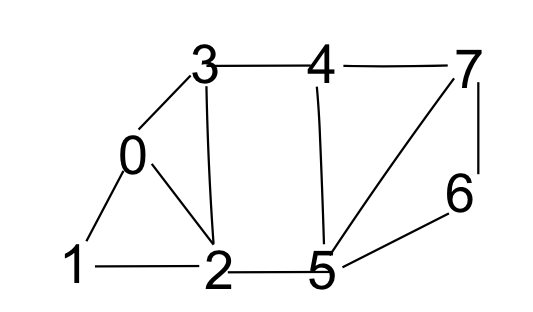

In [1]:
import numpy as np


In [2]:
from queue import Queue
 
graph = {0: [1,2,3], 1: [0, 2], 2: [0,1,3, 5], 
         3: [0, 2, 4], 4: [3,5,7], 5: [4,6,7], 
         6: [5,7],7:[4,5,6],8:[]}
print("The adjacency List representing the graph is:")
print(graph)
 

The adjacency List representing the graph is:
{0: [1, 2, 3], 1: [0, 2], 2: [0, 1, 3, 5], 3: [0, 2, 4], 4: [3, 5, 7], 5: [4, 6, 7], 6: [5, 7], 7: [4, 5, 6], 8: []}


In [3]:
def bfs(graph, source):
    Q = Queue()
    visited_vertices = set()
    Q.put(source)
    visited_vertices.update({source})
    while not Q.empty():
        vertex = Q.get()
        print(vertex, end="-->")
        for u in graph[vertex]:
            if u not in visited_vertices:
                Q.put(u)
                visited_vertices.update({u})
 
print("BFS traversal of graph with source 0 is:")
bfs(graph, 0)

BFS traversal of graph with source 0 is:
0-->1-->2-->3-->5-->4-->6-->7-->

## Part-02: Implement Depth First Search Algorithm
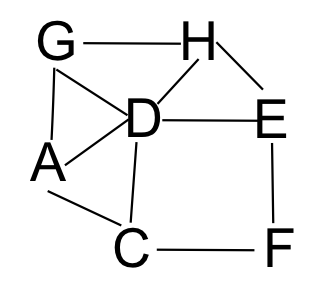

In [4]:
graph1 = {
    'A' : ['C','D','G'],
    'B' : ['A'],
    'C' : ['A','D','F'],
    'D' : ['A','C','E','G','H'],
    'E' : ['D','F','H'],
    'F' : ['C','E'],
    'G' : ['A','D','H'],
    'H' : ['D','E','G'],

}
print("The adjacency List representing the graph is:")
print(graph1)

The adjacency List representing the graph is:
{'A': ['C', 'D', 'G'], 'B': ['A'], 'C': ['A', 'D', 'F'], 'D': ['A', 'C', 'E', 'G', 'H'], 'E': ['D', 'F', 'H'], 'F': ['C', 'E'], 'G': ['A', 'D', 'H'], 'H': ['D', 'E', 'G']}


In [5]:
def dfs(graph, node, visited):
    if node not in visited:
        visited.append(node)
        for k in graph[node]:
            dfs(graph,k, visited)
    return visited
 
visited = dfs(graph1,'B', [])
print(visited)

['B', 'A', 'C', 'D', 'E', 'F', 'H', 'G']


## Part-03: Implementation of A* Algorithm / OR Graph Search 

In [ ]:
from copy import deepcopy
import numpy as np
import time
 
def bestsolution(state):
    bestsol = np.array([], int).reshape(-1, 9)
    count = len(state) - 1
    while count != -1:
        bestsol = np.insert(bestsol, 0, state[count]['puzzle'], 0)
        count = (state[count]['parent'])
    return bestsol.reshape(-1, 3, 3)
 
        
# checks for the uniqueness of the iteration(it).
def all(checkarray):
    set=[]
    for it in set:
        for checkarray in it:
            return 1
        else:
            return 0
 
 
# number of misplaced tiles 
def misplaced_tiles(puzzle,goal):
    mscost = np.sum(puzzle != goal) - 1
    return mscost if mscost > 0 else 0
 
 
def coordinates(puzzle):
    pos = np.array(range(9))
    for p, q in enumerate(puzzle):
        pos[q] = p
    return pos
 
 
# start of 8 puzzle evaluvation, using Misplaced tiles heuristics
def evaluvate_misplaced(puzzle, goal):
    steps = np.array([('up', [0, 1, 2], -3),('down', [6, 7, 8],  3),('left', [0, 3, 6], -1),('right', [2, 5, 8],  1)],
                dtype =  [('move',  str, 1),('position', list),('head', int)])
 
    dtstate = [('puzzle',  list),('parent', int),('gn',  int),('hn',  int)]
 
    costg = coordinates(goal)
    
    # initializing the parent, gn and hn, where hn is misplaced_tiles  function call  
    parent = -1
    gn = 0
    hn = misplaced_tiles(coordinates(puzzle), costg)
    state = np.array([(puzzle, parent, gn, hn)], dtstate)
 
   #priority queues with position as keys and fn as value.
    dtpriority = [('position', int),('fn', int)]
 
    priority = np.array([(0, hn)], dtpriority)
     
    while 1:
        priority = np.sort(priority, kind='mergesort', order=['fn', 'position'])      
        position, fn = priority[0]       
        # sort priority queue using merge sort,the first element is picked for exploring.                                          
        priority = np.delete(priority, 0, 0)                         
        puzzle, parent, gn, hn = state[position]
        puzzle = np.array(puzzle)
          
        blank = int(np.where(puzzle == 0)[0])   
       
        gn = gn + 1                            
        c = 1
        start_time = time.time()
        for s in steps:
            c = c + 1
            if blank not in s['position']:
                openstates = deepcopy(puzzle)         
                openstates[blank], openstates[blank + s['head']] = openstates[blank + s['head']], openstates[blank]
                
                if ~(np.all(list(state['puzzle']) == openstates, 1)).any():          
                    end_time = time.time()
                    if (( end_time - start_time ) > 2):
                        print(" The 8 puzzle is unsolvable \n")
                        break
                     
                    hn = misplaced_tiles(coordinates(openstates), costg) 
                    # generate and add new state in the list                    
                    q = np.array([(openstates, position, gn, hn)], dtstate)         
                    state = np.append(state, q, 0)
                    # f(n) is the sum of cost to reach node
                    fn = gn + hn                                        
                     
                    q = np.array([(len(state) - 1, fn)], dtpriority)
                    priority = np.append(priority, q, 0)
                     
                    if np.array_equal(openstates, goal):                      
                        print(' The 8 puzzle is solvable \n')
                        return state, len(priority)
                         
    return state, len(priority)
 
 
# initial state 
puzzle = []
 
puzzle.append(4)
puzzle.append(1)
puzzle.append(5)
puzzle.append(3)
puzzle.append(0)
puzzle.append(7)
puzzle.append(8)
puzzle.append(6)
puzzle.append(2)
 
#goal state       
goal = []
 
goal.append(1)
goal.append(2)
goal.append(3)
goal.append(4)
goal.append(5)
goal.append(6)
goal.append(7)
goal.append(8)
goal.append(0) 
 
 
state, visited = evaluvate_misplaced(puzzle, goal) 
bestpath = bestsolution(state)
print(str(bestpath).replace('[', ' ').replace(']', ''))
totalmoves = len(bestpath) - 1
print('\nSteps to reach goal:',totalmoves)
visit = len(state) - visited
print('Total nodes visited: ',visit, "\n")
      

/var/folders/0v/g60rvcv550jbfl5_nkj9mln00000gn/T/ipykernel_1554/2553944153.py:65: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  blank = int(np.where(puzzle == 0)[0])
